### 의사결정나무

>* 의사결정나무를 사용하기 위해 필요한 패키지 설치
 - install.packages("party")
 -  install.packages("e1071")

In [1]:
install.packages("party")
install.packages("e1071")

also installing the dependencies 'TH.data', 'libcoin', 'matrixStats', 'multcomp', 'mvtnorm', 'modeltools', 'strucchange', 'coin', 'sandwich'



package 'TH.data' successfully unpacked and MD5 sums checked
package 'libcoin' successfully unpacked and MD5 sums checked
package 'matrixStats' successfully unpacked and MD5 sums checked
package 'multcomp' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'modeltools' successfully unpacked and MD5 sums checked
package 'strucchange' successfully unpacked and MD5 sums checked
package 'coin' successfully unpacked and MD5 sums checked
package 'sandwich' successfully unpacked and MD5 sums checked
package 'party' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\TJOEUN-JR\AppData\Local\Temp\RtmpQVi44p\downloaded_packages
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\TJOEUN-JR\AppData\Local\Temp\RtmpQVi44p\downloaded_packages


In [2]:
# 라이브러리로딩
library(party)
library(e1071)
# caret : Classification and Reresstion Training의 약어로 복잡한 회귀와 분류문제
# 에 대한 훈련과 조정과정을 간소화하는 함수를 포함한 패키지
library(caret) 

Warning message:
"package 'party' was built under R version 3.6.3"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.2"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"Warning message:
"package 'e1071' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
# 랜텀샘플링
set.seed(42)
samp <- c(sample(1:50, 35), sample(51:100, 35), sample(101:150, 35))

data.train <- iris[samp, ]
data.test <- iris[-samp, ]

head(data.train)
tail(data.train)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
49,5.3,3.7,1.5,0.2,setosa
37,5.5,3.5,1.3,0.2,setosa
1,5.1,3.5,1.4,0.2,setosa
25,4.8,3.4,1.9,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa
36,5.0,3.2,1.2,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
110,7.2,3.6,6.1,2.5,virginica
134,6.3,2.8,5.1,1.5,virginica
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
144,6.8,3.2,5.9,2.3,virginica
143,5.8,2.7,5.1,1.9,virginica



	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  105 

1) Petal.Length <= 1.9; criterion = 1, statistic = 98.7
  2)*  weights = 35 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.6; criterion = 1, statistic = 49.39
    4) Petal.Length <= 4.6; criterion = 0.995, statistic = 10.309
      5)*  weights = 29 
    4) Petal.Length > 4.6
      6)*  weights = 7 
  3) Petal.Width > 1.6
    7)*  weights = 34 

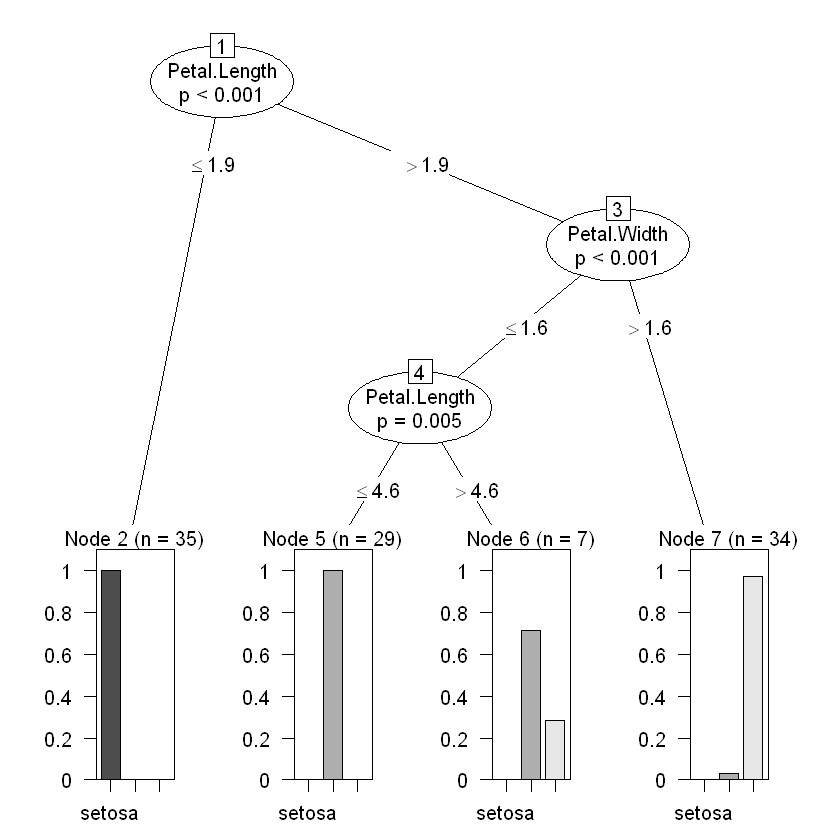

In [4]:
# 의사결정나무 생성
# ctree(formulas=종속변수~독립변수, data=데이터셋)
formula <- Species~Sepal.Length+Sepal.Width+Petal.Length+Petal.Width
iris_ctree <- ctree(formula, data.train)
iris_ctree
plot(iris_ctree)

In [5]:
# 검증용 데이터셋으로 예측
pred <- predict(iris_ctree, data.test)
pred # 에측한 품종

# 정답
actual <- data.test$Species

# confusionMatrix : 오분류표
confusionMatrix(pred, actual)

# 모델의 정확도 :  Accuracy : 0.9333
mean(pred == actual)

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor virginica  versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] versicolor virginica  virginica  virginica  virginica  virginica 
[43] versicolor virginica  virginica 
Levels: setosa versicolor virginica

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           0.8667
Specificity                 1.0000            0.9333           0.9667
Pos Pred Value              1.0000            0.8750           0.9286
Neg Pred Value              1.0000            0.9655           0.9355
Prevalence

[1] 0.9333333

### 랜텀포레스트

* 의사결정나무의 단점 : 과거데이터는 잘 맞추지만 새로운 데이터에 대한 예측력이 약함
* 과적합화를 방지할 수 있는 대표적인 방법중 하나가 `랜텀포레스트`
* 여러개의 의사결정나무를 만들고 투표를 통해 다수결로 결과를 결정, 처리속도가 빠르고 분류정밀도가 높다.

In [6]:
library(randomForest)
data(iris)
iris.tr <- data.train
iris.te <- data.test
rf <- randomForest(Species~., data=iris.tr, ntree=100)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [7]:
x <- subset(iris.te, select=-Species) # 품종을 제외한 데이터
head(x)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
6,5.4,3.9,1.7,0.4
9,4.4,2.9,1.4,0.2
14,4.3,3.0,1.1,0.1
16,5.7,4.4,1.5,0.4
17,5.4,3.9,1.3,0.4
19,5.7,3.8,1.7,0.3


In [8]:
pred <- predict(rf, x)
table(pred, iris.te$Species)
mean(pred == iris.te$Species)
confusionMatrix(pred, iris.te$Species)

            
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

[1] 0.9333333

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           0.8667
Specificity                 1.0000            0.9333           0.9667
Pos Pred Value              1.0000            0.8750           0.9286
Neg Pred Value              1.0000            0.9655           0.9355
Prevalence